In [1]:
import pandas as pd

In [2]:
df_ndcgs = pd.read_csv('control_vs_show-v1_queries_ndcg_difference_tables_with_v0v2.csv')
df_toptorsotail = pd.read_csv('top_searched_queries_stats_with_v0v2.csv')

In [15]:
len(df_ndcgs)

800

In [16]:
df_ndcgs = df_ndcgs.dropna()

In [18]:
len(df_ndcgs)

798

In [20]:
len(df_toptorsotail)

3001

In [21]:
df_toptorsotail = df_toptorsotail.dropna()

In [22]:
len(df_toptorsotail)

1186

In [25]:
df_ndcgs['v0_l2s'] = df_ndcgs['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
df_ndcgs['v2_l2s'] = df_ndcgs['v2_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))

/tmp/ipykernel_26844/3409624863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ndcgs['v0_l2s'] = df_ndcgs['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
/tmp/ipykernel_26844/3409624863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ndcgs['v2_l2s'] = df_ndcgs['v2_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))


In [26]:
df_toptorsotail['v0_l2s'] = df_toptorsotail['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
df_toptorsotail['v2_l2s'] = df_toptorsotail['v2_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))

In [28]:
recs = [] 
for i in df_ndcgs.to_dict('records'):
    v0_l2s = set(i['v0_l2s'])
    v2_l2s = set(i['v2_l2s'])
    jc = len(v0_l2s.intersection(v2_l2s)) / len(v0_l2s.union(v2_l2s))
    i['v0v2_l2s_jaccard'] = jc
    recs.append(i)
df_ndcgs = pd.DataFrame(recs)

recs = [] 
for i in df_toptorsotail.to_dict('records'):
    v0_l2s = set(i['v0_l2s'])
    v2_l2s = set(i['v2_l2s'])
    jc = len(v0_l2s.intersection(v2_l2s)) / len(v0_l2s.union(v2_l2s))
    i['v0v2_l2s_jaccard'] = jc
    recs.append(i)
df_toptorsotail = pd.DataFrame(recs)

# analyze ndcg

In [33]:
df_ndcgs['mean_lift'] = -(df_ndcgs['control - show-v1 NDCG @ 10'] + df_ndcgs['control - show-v1 NDCG @ 30'] + df_ndcgs['control - show-v1 NDCG @ 50'] + \
    df_ndcgs['control - show-v1 NDCG @ 100'] + df_ndcgs['control - show-v1 NDCG @ 300']) / 5

In [38]:
df_ndcgs[['mean_lift', 'v0v2_l2s_jaccard']].corr()

,mean_lift,v0v2_l2s_jaccard
mean_lift,1.000000,-0.001157
v0v2_l2s_jaccard,-0.001157,1.000000


In [58]:
df_ndcgs.sort_values('v0v2_l2s_jaccard').to_csv(
    'control_vs_show-v1_queries_ndcg_difference_tables_with_v0v2_with_jaccard.csv', index=False)

<AxesSubplot: xlabel='mean_lift', ylabel='v0v2_l2s_jaccard'>

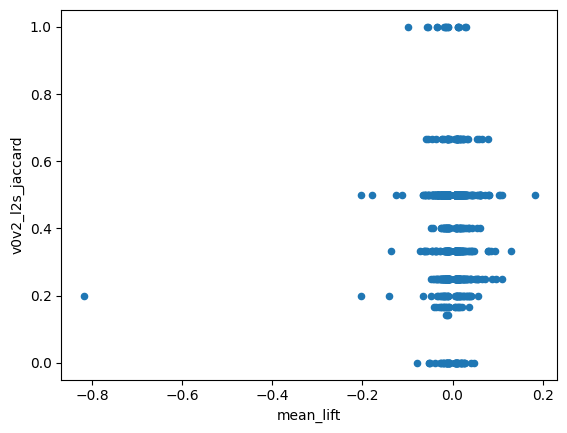

In [36]:
df_ndcgs.plot.scatter('mean_lift', 'v0v2_l2s_jaccard')

In [43]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('v0v2_l2s_jaccard').head(10).to_dict('records')

[{'query': 'dragon ball z',
  'query_type': 'A2C - negative',
  'v0_l2s': ['Toys & Hobbies > Action & Toy Figures',
   "Men's Clothing > Tops & Tees",
   "Men's Clothing > Hoodies & Sweatshirts"],
  'v2_l2s': ['Automobiles & Motorcycles > Motorcycle Accessories & Parts',
   'Automobiles & Motorcycles > Motorcycle Accessories & Parts',
   'Automobiles & Motorcycles > Motorcycle Accessories & Parts'],
  'v0v2_l2s_jaccard': 0.0,
  'mean_lift': -0.007708853999999999},
 {'query': 'baby gear',
  'query_type': 'Relevance - Negative',
  'v0_l2s': ['Mother & Kids > Safety Equipment',
   'Mother & Kids',
   'Mother & Kids > Baby Care',
   "Mother & Kids > Girls' Clothing"],
  'v2_l2s': ['Mother & Kids > Activity & Gear',
   'Mother & Kids > Activity & Gear',
   'Mother & Kids > Activity & Gear'],
  'v0v2_l2s_jaccard': 0.0,
  'mean_lift': -0.009664879999999999},
 {'query': 'beauty and cosmetics',
  'query_type': 'GMV - negative',
  'v0_l2s': ['Beauty & Health',
   'Beauty & Health > Beauty Essent

In [44]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('v0v2_l2s_jaccard', ascending=False).head(10).to_dict('records')

[{'query': 'bulletproof vest',
  'query_type': 'CTR - negative',
  'v0_l2s': ['Security & Protection > Self Defense Supplies',
   'Sports > Sports Clothing',
   'Security & Protection'],
  'v2_l2s': ['Security & Protection > Self Defense Supplies',
   'Sports > Sports Clothing',
   'Security & Protection'],
  'v0v2_l2s_jaccard': 1.0,
  'mean_lift': -0.057132074},
 {'query': 'bulletproof vest',
  'query_type': 'A2C - negative',
  'v0_l2s': ['Security & Protection > Self Defense Supplies',
   'Sports > Sports Clothing',
   'Security & Protection'],
  'v2_l2s': ['Security & Protection > Self Defense Supplies',
   'Sports > Sports Clothing',
   'Security & Protection'],
  'v0v2_l2s_jaccard': 1.0,
  'mean_lift': -0.09787193400000001},
 {'query': 'acrylic nail kit',
  'query_type': 'A2C - positive',
  'v0_l2s': ['Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools',
   'Beauty & Health > Nail Art & Tools'],
  'v2_l2s': ['Beauty & Health > Nail Art & Tools',
   'Beauty

In [45]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('mean_lift').head(10).to_dict('records')

[{'query': 'yeezy slides',
  'query_type': 'Relevance - Negative',
  'v0_l2s': ["Shoes > Men's Shoes", 'Sports > Sneakers', 'Shoes'],
  'v2_l2s': ["Shoes > Women's Shoes",
   "Shoes > Men's Shoes",
   "Mother & Kids > Children's Shoes"],
  'v0v2_l2s_jaccard': 0.2,
  'mean_lift': -0.8178302439999999},
 {'query': 'yeezy slides',
  'query_type': 'CTR - negative',
  'v0_l2s': ["Shoes > Men's Shoes", 'Sports > Sneakers', 'Shoes'],
  'v2_l2s': ["Shoes > Women's Shoes",
   "Shoes > Men's Shoes",
   "Mother & Kids > Children's Shoes"],
  'v0v2_l2s_jaccard': 0.2,
  'mean_lift': -0.203724858},
 {'query': 'guns for adults',
  'query_type': 'A2C - negative',
  'v0_l2s': ['Toys & Hobbies > Outdoor Fun & Sports',
   'Sports > Hunting',
   'Sports',
   'Tools > Hand Tools'],
  'v2_l2s': ['Toys & Hobbies > Outdoor Fun & Sports',
   'Sports > Hunting',
   'Sports > Hunting'],
  'v0v2_l2s_jaccard': 0.5,
  'mean_lift': -0.20202509400000004},
 {'query': 'guns for adults',
  'query_type': 'CTR - negative',

In [47]:
df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('mean_lift', ascending=False).head(10).to_dict('records')

[{'query': 'iphone 11',
  'query_type': 'GMV - positive',
  'v0_l2s': ['Cellphones & Telecommunications > Mobile Phone Accessories',
   'Cellphones & Telecommunications',
   'Cellphones & Telecommunications > iPhones',
   'Cellphones & Telecommunications > Phone Bags & Cases'],
  'v2_l2s': ['Cellphones & Telecommunications > iPhones',
   'Cellphones & Telecommunications > Mobile Phone Accessories',
   'Cellphones & Telecommunications > Mobile Phone Accessories'],
  'v0v2_l2s_jaccard': 0.5,
  'mean_lift': 0.182701328},
 {'query': 'sex doll',
  'query_type': 'A2C - positive',
  'v0_l2s': ['Beauty & Health > Sexual Wellness',
   'Beauty & Health > Sexual Wellness',
   'Toys & Hobbies > Action & Toy Figures',
   'Beauty & Health > Sexual Wellness'],
  'v2_l2s': ['Beauty & Health > Sexual Wellness',
   'Beauty & Health > Sexual Wellness',
   'Toys & Hobbies > Dolls & Accessories'],
  'v0v2_l2s_jaccard': 0.3333333333333333,
  'mean_lift': 0.129826786},
 {'query': 'iphone 12',
  'query_type':

# analyze head torso tail

<AxesSubplot: ylabel='Frequency'>

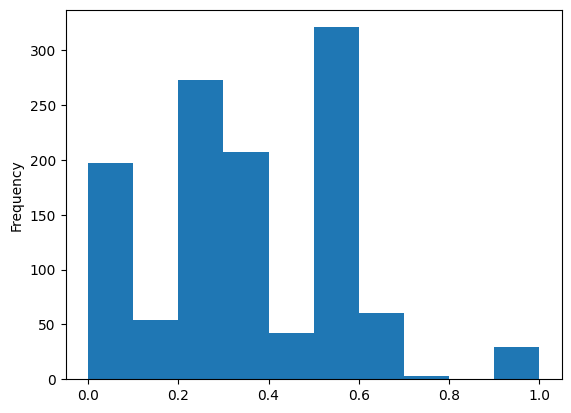

In [51]:
df_toptorsotail.v0v2_l2s_jaccard.plot.hist()

In [57]:
df_toptorsotail.sort_values('v0v2_l2s_jaccard').to_csv(
    'top_searched_queries_stats_with_v0v2_with_jaccard.csv', index=False)